In [201]:
import pandas as pd
import numpy as np
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [202]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [203]:
numeric_cars.head(5)


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [204]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [205]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [206]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [207]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [208]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [209]:
# Normalize all columnns to range from 0 to 1 except the target column.

price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [210]:
len(numeric_cars)

201

In [211]:
numeric_cars.shape

(201, 15)

In [212]:
numeric_cars.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [213]:
print(range(1, 10, 2))

range(1, 10, 2)


## Univariate Model


In [224]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)

sorted_features = rmse_results_series.sort_values()
print(sorted_features)

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64


In [225]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    Neighbors = [x for x in range(1, 10, 2)]
    k_rmses = {}
    
    for k in Neighbors:
        knn = KNeighborsRegressor(n_neighbors=k)

        # Fit a KNN model using default k value.
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses





k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

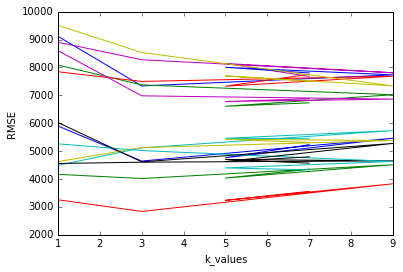

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y)
    plt.xlabel('k_values')
    plt.ylabel('RMSE')

## Multivariate Model


In [228]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

cols_2 = ['engine-size', 'horsepower']     
cols_3 = ['engine-size', 'horsepower', 'curb-weight']     
cols_4 = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']     
cols_5 = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width']     
           
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    Neighbors = [5]
    k_rmses = {}
    
    for k in Neighbors:
        knn = KNeighborsRegressor(n_neighbors=k)

        # Fit a KNN model using default k value.
        knn.fit(train_df[train_cols], train_df[target_col])
    
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [248]:
knn_train_test(cols_5, 'price', numeric_cars)

{5: 3410.2170133901805}

## Hyperparameter Tuning


In [286]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

cols_2 = ['engine-size', 'horsepower']     
cols_3 = ['engine-size', 'horsepower', 'curb-weight']     
cols_4 = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']     
cols_5 = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width']     
           
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    
    Neighbors = [x for x in range(1, 26, 1)]
    k_rmses = {}
    
    for k in Neighbors:
        knn = KNeighborsRegressor(n_neighbors=k)

        # Fit a KNN model using default k value.
        knn.fit(train_df[train_cols], train_df[target_col])
    
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [292]:
knn_train_test(cols_2, 'price', numeric_cars)

{1: 2783.6204237227344,
 2: 2657.7963807419765,
 3: 2792.586573031673,
 4: 2891.5329686923255,
 5: 2949.8817277180374,
 6: 3096.402601694776,
 7: 3164.681969020496,
 8: 3413.228359192009,
 9: 3748.6716603306486,
 10: 4080.7125057341937,
 11: 4215.6372280600335,
 12: 4275.421524277872,
 13: 4373.901683035496,
 14: 4424.285137239815,
 15: 4539.505493095937,
 16: 4667.307671446768,
 17: 4729.605305844226,
 18: 4790.556632159094,
 19: 4824.3866193292615,
 20: 4840.850914693829,
 21: 4837.429062000271,
 22: 4831.16988267597,
 23: 4861.679492959275,
 24: 4903.346008862579,
 25: 4955.892429427362}

In [281]:
knn_train_test(cols_3, 'price', numeric_cars)

{1: 3131.798233957262,
 2: 3005.5737903777945,
 3: 3016.72346189447,
 4: 3144.445503247916,
 5: 3435.2601095401815,
 6: 3490.638342356411,
 7: 3734.328302612299,
 8: 3936.1203798667007,
 9: 3976.4878693193755,
 10: 4124.277723900439,
 11: 4213.73633336988,
 12: 4230.509703492906,
 13: 4176.851250534326,
 14: 4292.415585753593,
 15: 4382.50190463831,
 16: 4418.525629386618,
 17: 4427.787909307598,
 18: 4493.877120715579,
 19: 4591.965375700132,
 20: 4597.552075200799,
 21: 4674.306863451769,
 22: 4684.262850205994,
 23: 4718.175304198165,
 24: 4757.187227038854,
 25: 4783.665528691579}

In [282]:
knn_train_test(cols_4, 'price', numeric_cars)

{1: 2927.820116343107,
 2: 2600.431466008274,
 3: 2799.0983199667144,
 4: 3074.9999988931822,
 5: 3286.5597353252815,
 6: 3705.1702717384333,
 7: 3822.180444798032,
 8: 3986.7014080509525,
 9: 4210.340136384571,
 10: 4213.315457869819,
 11: 4182.323353796191,
 12: 4288.696189501458,
 13: 4249.894628724804,
 14: 4357.287937912011,
 15: 4451.408927529352,
 16: 4459.2244133241875,
 17: 4495.028598279714,
 18: 4546.50352887804,
 19: 4643.185310790349,
 20: 4668.634597012364,
 21: 4698.7862455275545,
 22: 4700.1491313974975,
 23: 4711.210423921079,
 24: 4739.97994062864,
 25: 4766.177179071813}

In [283]:
knn_train_test(cols_5, 'price', numeric_cars)

{1: 2824.7061233282866,
 2: 2915.6731645496975,
 3: 3012.4204546509704,
 4: 3202.8876051367483,
 5: 3410.2170133901805,
 6: 3618.4509432660384,
 7: 3622.6290209234803,
 8: 3848.635835654326,
 9: 3977.8149139381726,
 10: 3994.8132211260104,
 11: 4159.843526607947,
 12: 4294.3389473154875,
 13: 4380.848359486949,
 14: 4466.368754416089,
 15: 4522.420711094978,
 16: 4536.427578452413,
 17: 4587.098443664006,
 18: 4622.107837952761,
 19: 4612.890107622797,
 20: 4632.693976139521,
 21: 4712.917548435062,
 22: 4676.301064518744,
 23: 4691.189310956096,
 24: 4755.990767231825,
 25: 4804.323266214411}